In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_excel('data/cars_train.xlsx')
train_data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [5]:
train_data.fillna(value=0,inplace=True)

In [6]:
#test_data.drop([column='Car_pric']).fillna(value=0,inplace=True)

In [7]:
train_data.isna().sum()

symboling            0
normalized.losses    0
make                 0
fuel.type            0
aspiration           0
num.of.doors         0
body.style           0
drive.wheels         0
engine.location      0
wheel.base           0
length               0
width                0
height               0
curb.weight          0
engine.type          0
num.of.cylinders     0
engine.size          0
fuel.system          0
bore                 0
stroke               0
compression.ratio    0
horsepower           0
peak.rpm             0
city.mpg             0
highway.mpg          0
Car_Price            0
dtype: int64

In [8]:
test_data = pd.read_excel('data/cars_test.xlsx')
test_data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,NaN


In [9]:
testdata = test_data.drop(columns=['Car_Price'])

In [10]:
test_data.isna().sum()

symboling             0
normalized.losses    12
make                  0
fuel.type             0
aspiration            0
num.of.doors          5
body.style            0
drive.wheels          0
engine.location       4
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      1
engine.size           0
fuel.system           0
bore                  1
stroke                1
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
Car_Price            52
dtype: int64

## EDA

In [11]:
train_data.corr()

C:\Users\2001s\AppData\Local\Temp\ipykernel_19924\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
symboling,1.000000,0.242715,-0.539268,-0.362855,-0.198751,-0.531914,-0.181271,-0.049741,-0.225322,-0.169621,-0.171719,0.129676,0.189130,-0.060925,0.011946,-0.045524
normalized.losses,0.242715,1.000000,-0.185322,-0.201507,-0.116851,-0.172716,-0.219266,-0.251546,-0.200686,-0.110781,-0.085686,-0.136359,0.169831,0.119032,0.132354,-0.197043
wheel.base,-0.539268,-0.185322,1.000000,0.863965,0.745606,0.556391,0.729194,0.490241,0.278572,0.120436,0.295181,0.253113,-0.173870,-0.425518,-0.502093,0.511438
length,-0.362855,-0.201507,0.863965,1.000000,0.817113,0.429977,0.859048,0.648158,0.328001,0.109082,0.192339,0.464726,-0.167780,-0.654932,-0.691100,0.649869
width,-0.198751,-0.116851,0.745606,0.817113,1.000000,0.173063,0.867815,0.730638,0.286598,0.115537,0.220524,0.583028,-0.115869,-0.644993,-0.670332,0.641285
height,-0.531914,-0.172716,0.556391,0.429977,0.173063,1.000000,0.212815,-0.036704,0.252464,0.091401,0.291657,-0.179025,-0.135607,0.017771,-0.037604,0.097306
curb.weight,-0.181271,-0.219266,0.729194,0.859048,0.867815,0.212815,1.000000,0.847509,0.352282,0.135416,0.167121,0.692041,-0.107158,-0.764687,-0.802988,0.778401
engine.size,-0.049741,-0.251546,0.490241,0.648158,0.730638,-0.036704,0.847509,1.000000,0.448804,0.285808,0.056988,0.770629,-0.097079,-0.661474,-0.676943,0.816713
bore,-0.225322,-0.200686,0.278572,0.328001,0.286598,0.252464,0.352282,0.448804,1.000000,0.643114,0.029239,0.247252,-0.219804,-0.145424,-0.160614,0.267595
stroke,-0.169621,-0.110781,0.120436,0.109082,0.115537,0.091401,0.135416,0.285808,0.643114,1.000000,0.125464,0.044297,-0.192979,0.099560,0.081035,0.067482


C:\Users\2001s\AppData\Local\Temp\ipykernel_19924\4047705056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,vmax=1,vmin=-1)


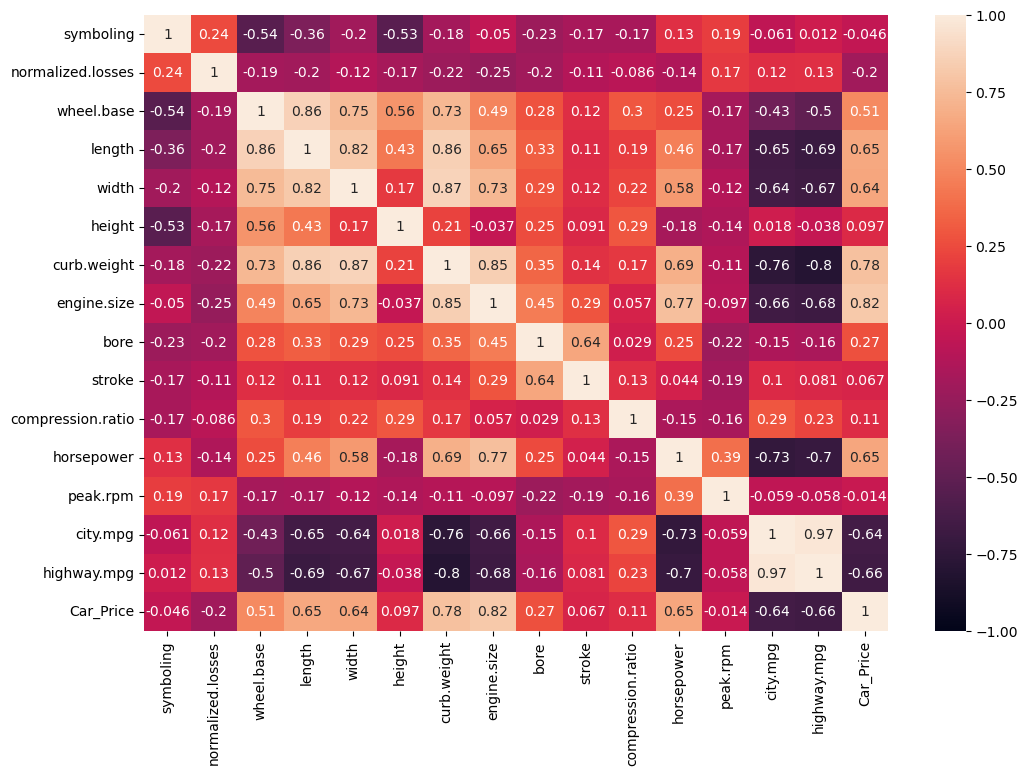

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'wheel.base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression.ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak.rpm'}>,
        <Axes: title={'center': 'city.mpg'}>,
        <Axes: title={'center': 'highway.mpg'}>,
        <Axes: title={'center': 'Car_Price'}>]], dtype=object)

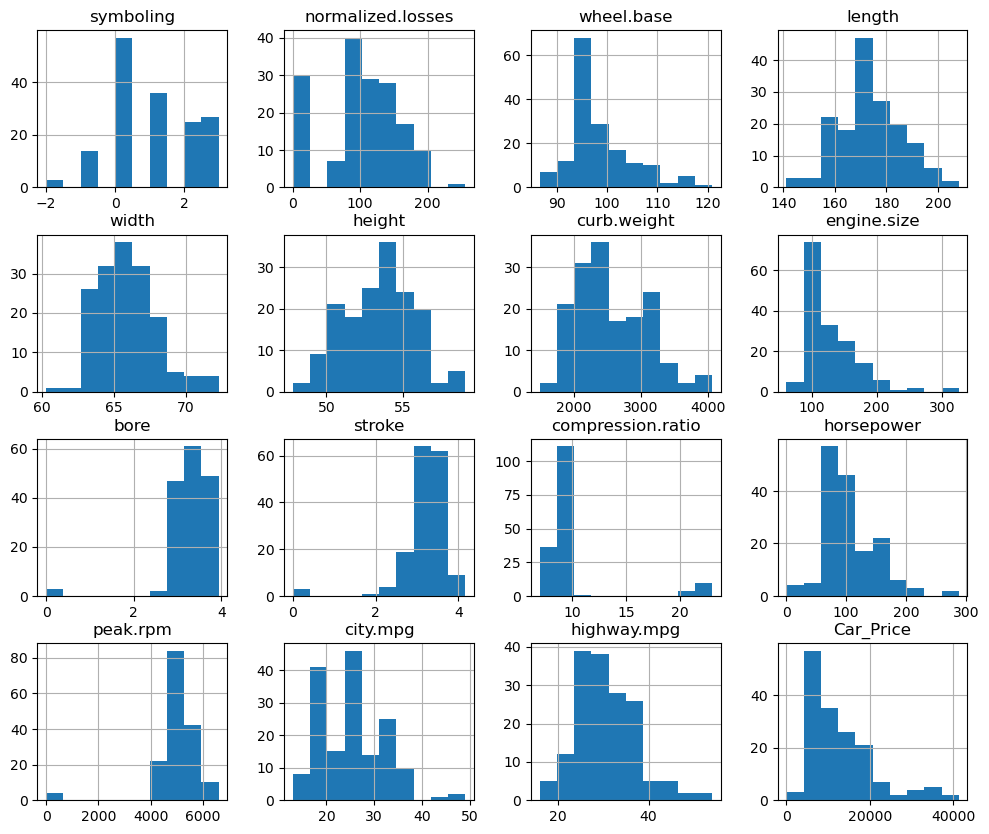

In [13]:
train_data.hist(figsize=(12,10))

<Axes: >

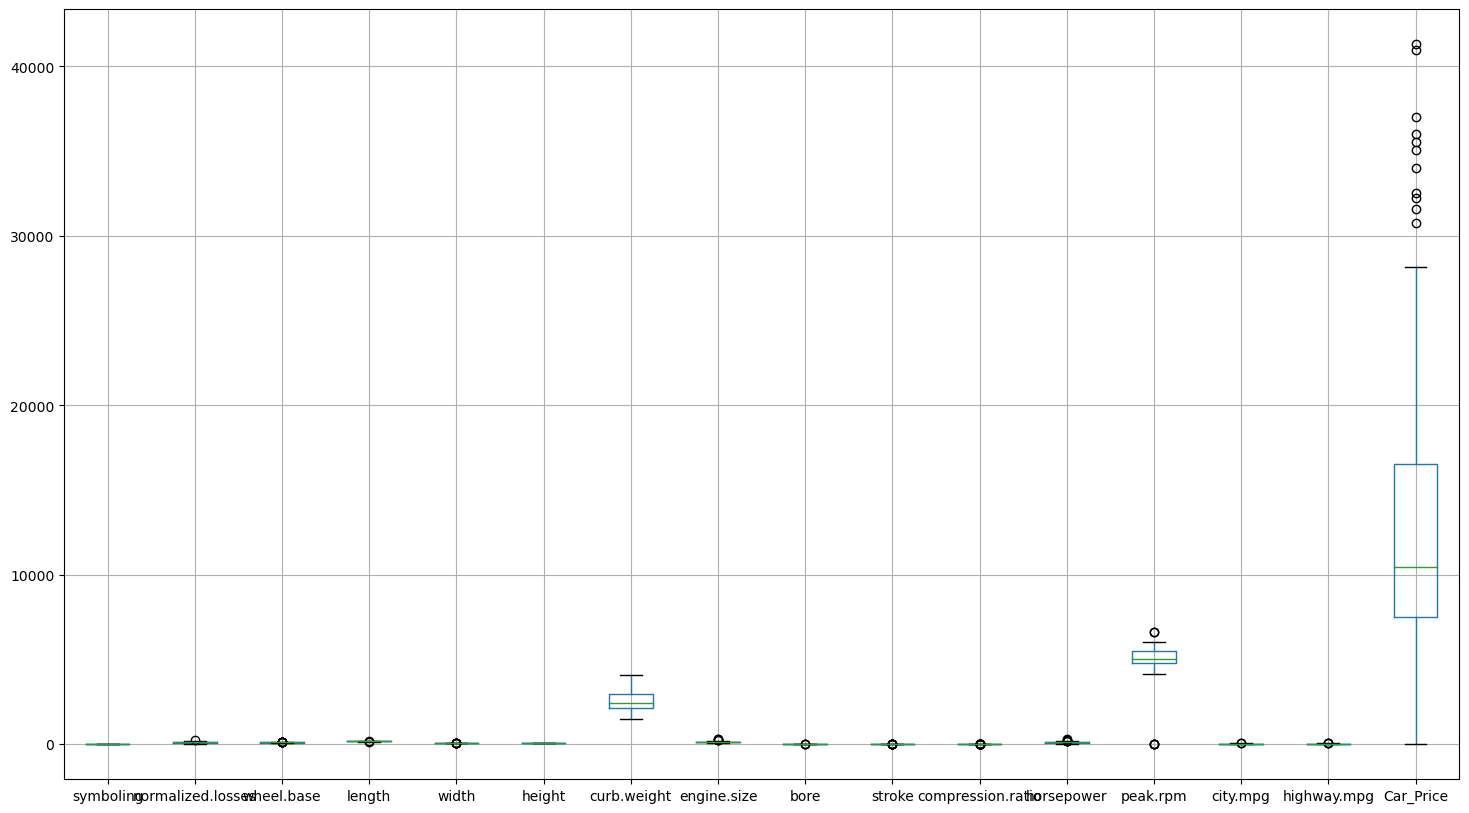

In [14]:
train_data.boxplot(figsize=(18,10))

In [15]:
columns_to_fill = test_data.columns.difference(['Car_Price'])
test_data[columns_to_fill] = test_data[columns_to_fill].fillna(0)

In [16]:
# Split dataset

# Feature Selected which has high correlation
x = train_data[[
    'wheel.base',
    'length',
    'width',
    'height',
    'curb.weight',
    'engine.size',
    'bore',
    'stroke',
    'compression.ratio',
    'horsepower'
]]
y = train_data.iloc[:,-1:]

In [17]:
from sklearn.model_selection import train_test_split
# spliting train and test dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.20,random_state = 2)

# Lasso Regression model

In [27]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

print('<------------ Lasso Regression model ----------->\n')
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(xtrain,ytrain)
lasso_pred = lasso_reg.predict(xtest)

print("Lasso Train score \t",lasso_reg.score(xtrain,ytrain))
print()
print("Lasso Test score \t",lasso_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,lasso_pred))
print()
# Evaluate the Lasso regression Model
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error
print('MAE \t',mean_absolute_error(ytest,lasso_pred))
print('MSE \t',mean_squared_error(ytest,lasso_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,lasso_pred)))

<------------ Lasso Regression model ----------->

Lasso Train score 	 0.721122667416157

Lasso Test score 	 0.7528484260110737

R-Square 	 0.7528484260110737

MAE 	 3087.395817735319
MSE 	 15241482.150770431
RMSE 	 3904.0340867838786


In [28]:
# Implement the Ridge regression Model
print('<------------ Ridge Regression model ----------->\n')
ridge_reg = Ridge(alpha = 0.01)
ridge_reg.fit(xtrain,ytrain)
ridge_pred = ridge_reg.predict(xtest)

print("Lasso Train score:\t",ridge_reg.score(xtrain,ytrain))
print()
print("Lasso Test score:\t",ridge_reg.score(xtest,ytest))
print()
print("R-Square:\t",r2_score(ytest,ridge_pred))
print()
# Evaluate the Ridge regression Model
print('MAE \t',mean_absolute_error(ytest,ridge_pred))
print('MSE \t',mean_squared_error(ytest,ridge_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,ridge_pred)))

<------------ Ridge Regression model ----------->

Lasso Train score:	 0.7211226664211696

Lasso Test score:	 0.7528516727436303

R-Square:	 0.7528516727436303

MAE 	 3087.392653706613
MSE 	 15241281.929442637
RMSE 	 3904.0084438231734


# RandomForest Classifier Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
ranc = RandomForestRegressor(n_estimators=10,random_state=1)

ranc.fit(xtest,ytest)
ypred  = ranc.predict(xtest)

print("Accuracy score :\t",r2_score(ytest,ypred))
print()
print('Mean squared Error :\t',mean_squared_error(ytest,ypred))
print()
print('RMSE :\t', np.sqrt(mean_squared_error(ytest,ypred)))

Accuracy score :	 0.9603279459599829

Mean squared Error :	 2446518.522121212

RMSE :	 1564.1350715718934


C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [19]:
# Split dataset

X = test_data[[
    'wheel.base',
    'length',
    'width',
    'height',
    'curb.weight',
    'engine.size',
    'bore',
    'stroke',
    'compression.ratio',
    'horsepower',
]]


In [20]:
ranc.fit(x,y)
X['Car_Price']  = ranc.predict(X)

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\2001s\AppData\Local\Temp\ipykernel_19924\2173060111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Car_Price']  = ranc.predict(X)


In [25]:
X.head()

,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,Car_Price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,16500.0
1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,13176.5
2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,12469.1
3,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,16882.0
4,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,18625.1


In [22]:
X.to_csv('data/test_data_Carprice.csv', index=False)

# Boosting - Adaboost with base model

In [23]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator=ranc,n_estimators=15)
ada.fit(xtrain,ytrain)
ada_pred = ada.predict(xtest)

print("Accuracy score :\t",r2_score(ytest,ada_pred))
print()
print('Mean squared Error :\t',mean_squared_error(ytest,ada_pred))
print()
print('RMSE :\t', np.sqrt(mean_squared_error(ytest,ada_pred)))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score :	 0.9022018841764445

Mean squared Error :	 6031069.163939394

RMSE :	 2455.82352052003


# Boosting - GradientBoot

In [24]:
from sklearn.ensemble import GradientBoostingRegressor


grad = GradientBoostingRegressor()
grad.fit(xtrain,ytrain)
grad_pred = grad.predict(xtest)

print("Accuracy score :\t",r2_score(ytest,grad_pred))
print()
print('Mean squared Error :\t',mean_squared_error(ytest,grad_pred))
print()
print('RMSE :\t', np.sqrt(mean_squared_error(ytest,grad_pred)))

Accuracy score :	 0.8821436572606656

Mean squared Error :	 7268031.173036882

RMSE :	 2695.928629069561


C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
